In [1]:
import math
import warnings

import entwiner
import unweaver

import geopandas as gpd
import numpy as np
import plotnine as p
from shapely.geometry import box, shape, Point

# Suppress warnings, mostly from plotnine
warnings.filterwarnings('ignore')

In [2]:
landmass = gpd.read_file("../artifacts/seattle_landmasses.geojson")
print(landmass.crs)
#landmass = landmass.to_crs(26910)

reach_metrics = gpd.read_file("../data/reach_metrics.gpkg")
reach_metrics = reach_metrics.to_crs(26910)

BOUNDS = reach_metrics.total_bounds

epsg:26910


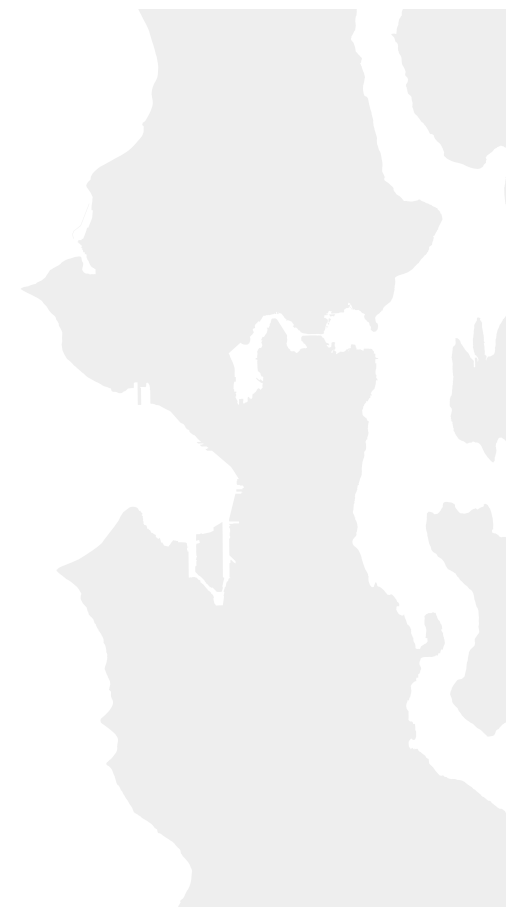

<ggplot: (8760077696901)>

In [3]:
def base_plot():
    plot = (
        p.ggplot(landmass)
        + p.geom_map(color=None, fill="#EEEEEE")
        + p.xlim(BOUNDS[0], BOUNDS[2])
        + p.ylim(BOUNDS[1], BOUNDS[3])
        + p.coord_fixed()
        + p.theme_void()
        + p.theme(panel_background=p.element_rect(fill="#ffffff"))
    )
    return plot

base_plot()

In [4]:
reach_metrics["sqr_wheelchair"] = reach_metrics["nsr_wheelchair"] / reach_metrics["nsr_walk"]
reach_metrics["sqr_electric"] = reach_metrics["nsr_electric"] / reach_metrics["nsr_walk"]

In [5]:
def plot_lines(gdf, color_aes, scale_color_kwargs=None):
    if scale_color_kwargs is None:
        scale_color_kwargs = {}
    
    plot = base_plot()
    plot += p.geom_map(p.aes(color=color_aes), data=reach_metrics)
    plot += p.scale_color_cmap(name="viridis", **scale_color_kwargs)
    
    return plot

In [6]:
def sidewalk_reach_quotient(row, profile):
    column = f"nsr_{profile}"
    base = "nsr_walk"
    numerator = row[column]
    denominator = row[base]
    if numerator == 0:
        if denominator == 0:
            return 1
        else:
            return 0
    elif denominator == 0:
        return 0
    elif np.isnan(numerator) or np.isnan(denominator):
        return 1
    else:
        return numerator / denominator

reach_metrics["srq_wheelchair"] = reach_metrics.apply(sidewalk_reach_quotient, profile="wheelchair", axis=1)
reach_metrics["srq_electric"] = reach_metrics.apply(sidewalk_reach_quotient, profile="electric", axis=1)

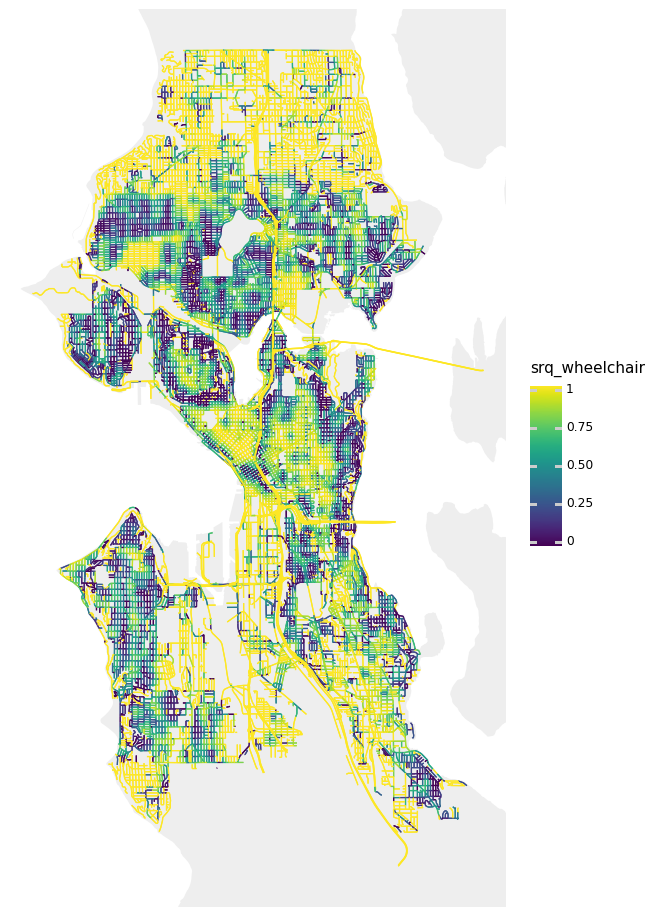

<ggplot: (8759976782096)>

In [7]:
plot = plot_lines(
    reach_metrics,
    "srq_wheelchair",
    scale_color_kwargs={"limits": (0, 1)}
)
plot.save("../artifacts/figures/Fig5/figure_srq_wheelchair.png", dpi=180)
plot.save("../artifacts/figures/Fig5/figure_srq_wheelchair.svg", dpi=180)
plot

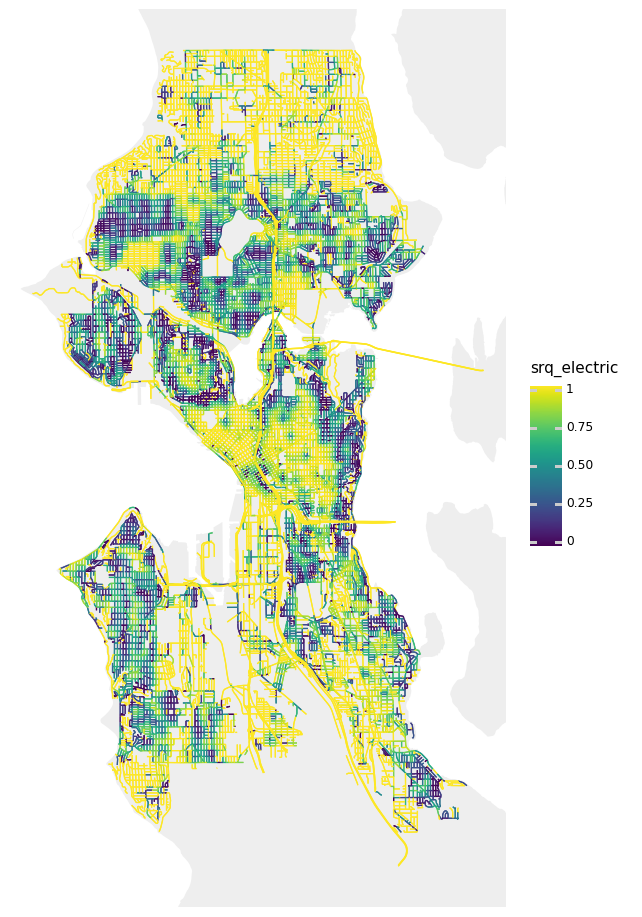

<ggplot: (8759975674661)>

In [8]:
plot = plot_lines(
    reach_metrics,
    "srq_electric",
    scale_color_kwargs={"limits": (0, 1)}
)
plot.save("../artifacts/figures/Fig5/figure_srq_powered.png", dpi=180)
plot.save("../artifacts/figures/Fig5/figure_srq_powered.svg", dpi=180)
plot